# Introduction:

👉 In this dataset, we will conduct Data Balance Analysis which consists of measures on the Adult Census income dataset to determine how well features and feature values are represented in the dataset.In real time the adult information at the time of census given by adult person while filling out an online application form. It is expected that the development of machine learning models that can help the company to predict adult income ,education and age etc.

👉 Below link is for selected adult_census_income dataset

https://www.kaggle.com/datasets/uciml/adult-census-income

👉 Importing libraries that will be used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Reading Data Set:

👉 After importing libraries, we will also import the dataset that will be used.

In [2]:
df=pd.read_csv("D:/PYTHON/ML/project with report/Using_ML_adult_census_income/adult.csv")

In [3]:
df.shape

(32561, 15)

👉 As can be seen in the data set 32561 rows and 15 columns are present.

# Data Exploration :


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

👉 no null value in dataset

# Data Visualization:

<AxesSubplot:xlabel='count', ylabel='income'>

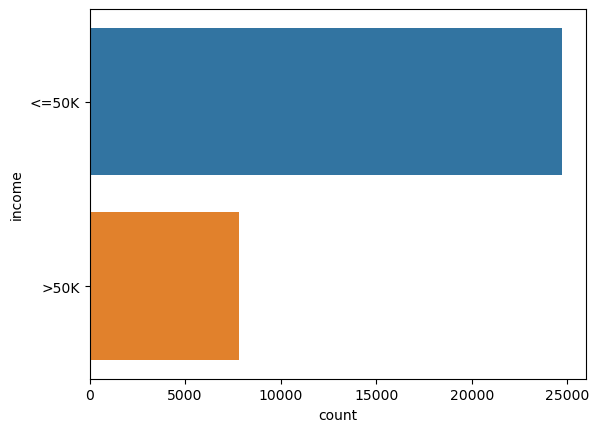

In [9]:
#creating a count plot for income

sns.countplot(y='income', data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

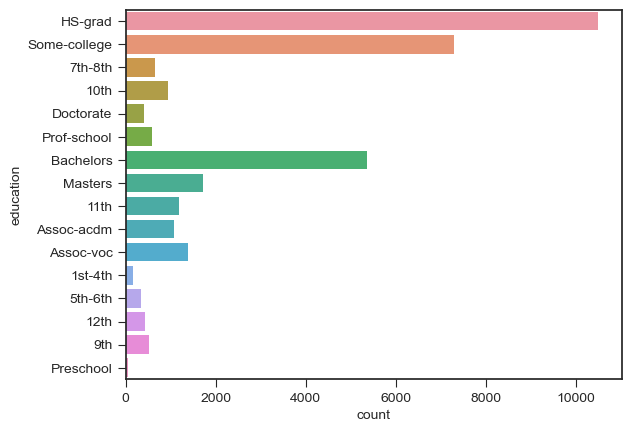

In [10]:
# create a count plot of education
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=df)

<AxesSubplot:xlabel='count', ylabel='marital.status'>

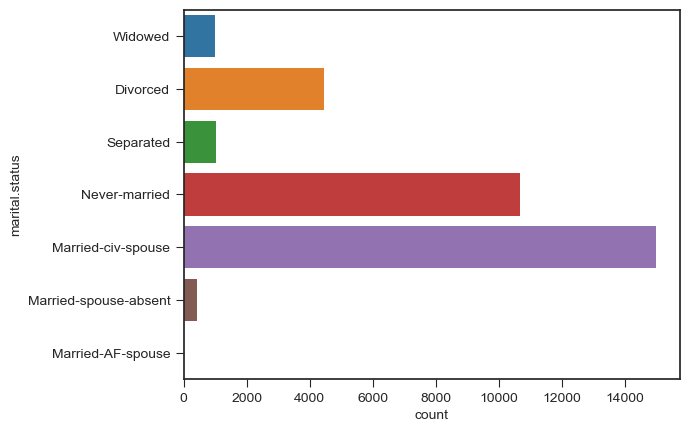

In [11]:
# create a count plot of marital status
plt.style.use('seaborn-ticks')
sns.countplot(y='marital.status', data=df)

<AxesSubplot:xlabel='count', ylabel='occupation'>

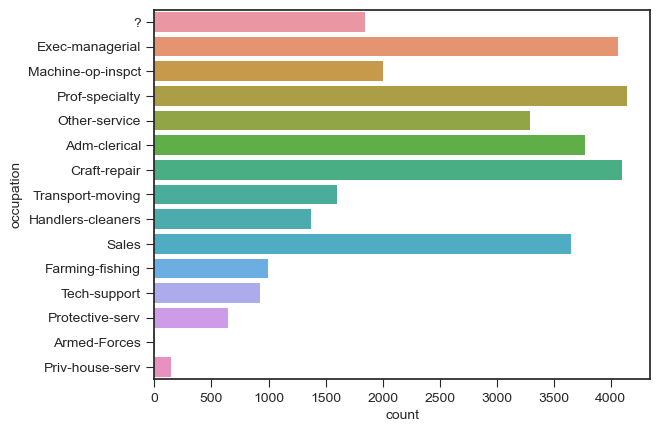

In [12]:
# create a count plot of occcupation
plt.style.use('seaborn-ticks')
sns.countplot(y="occupation",data=df)

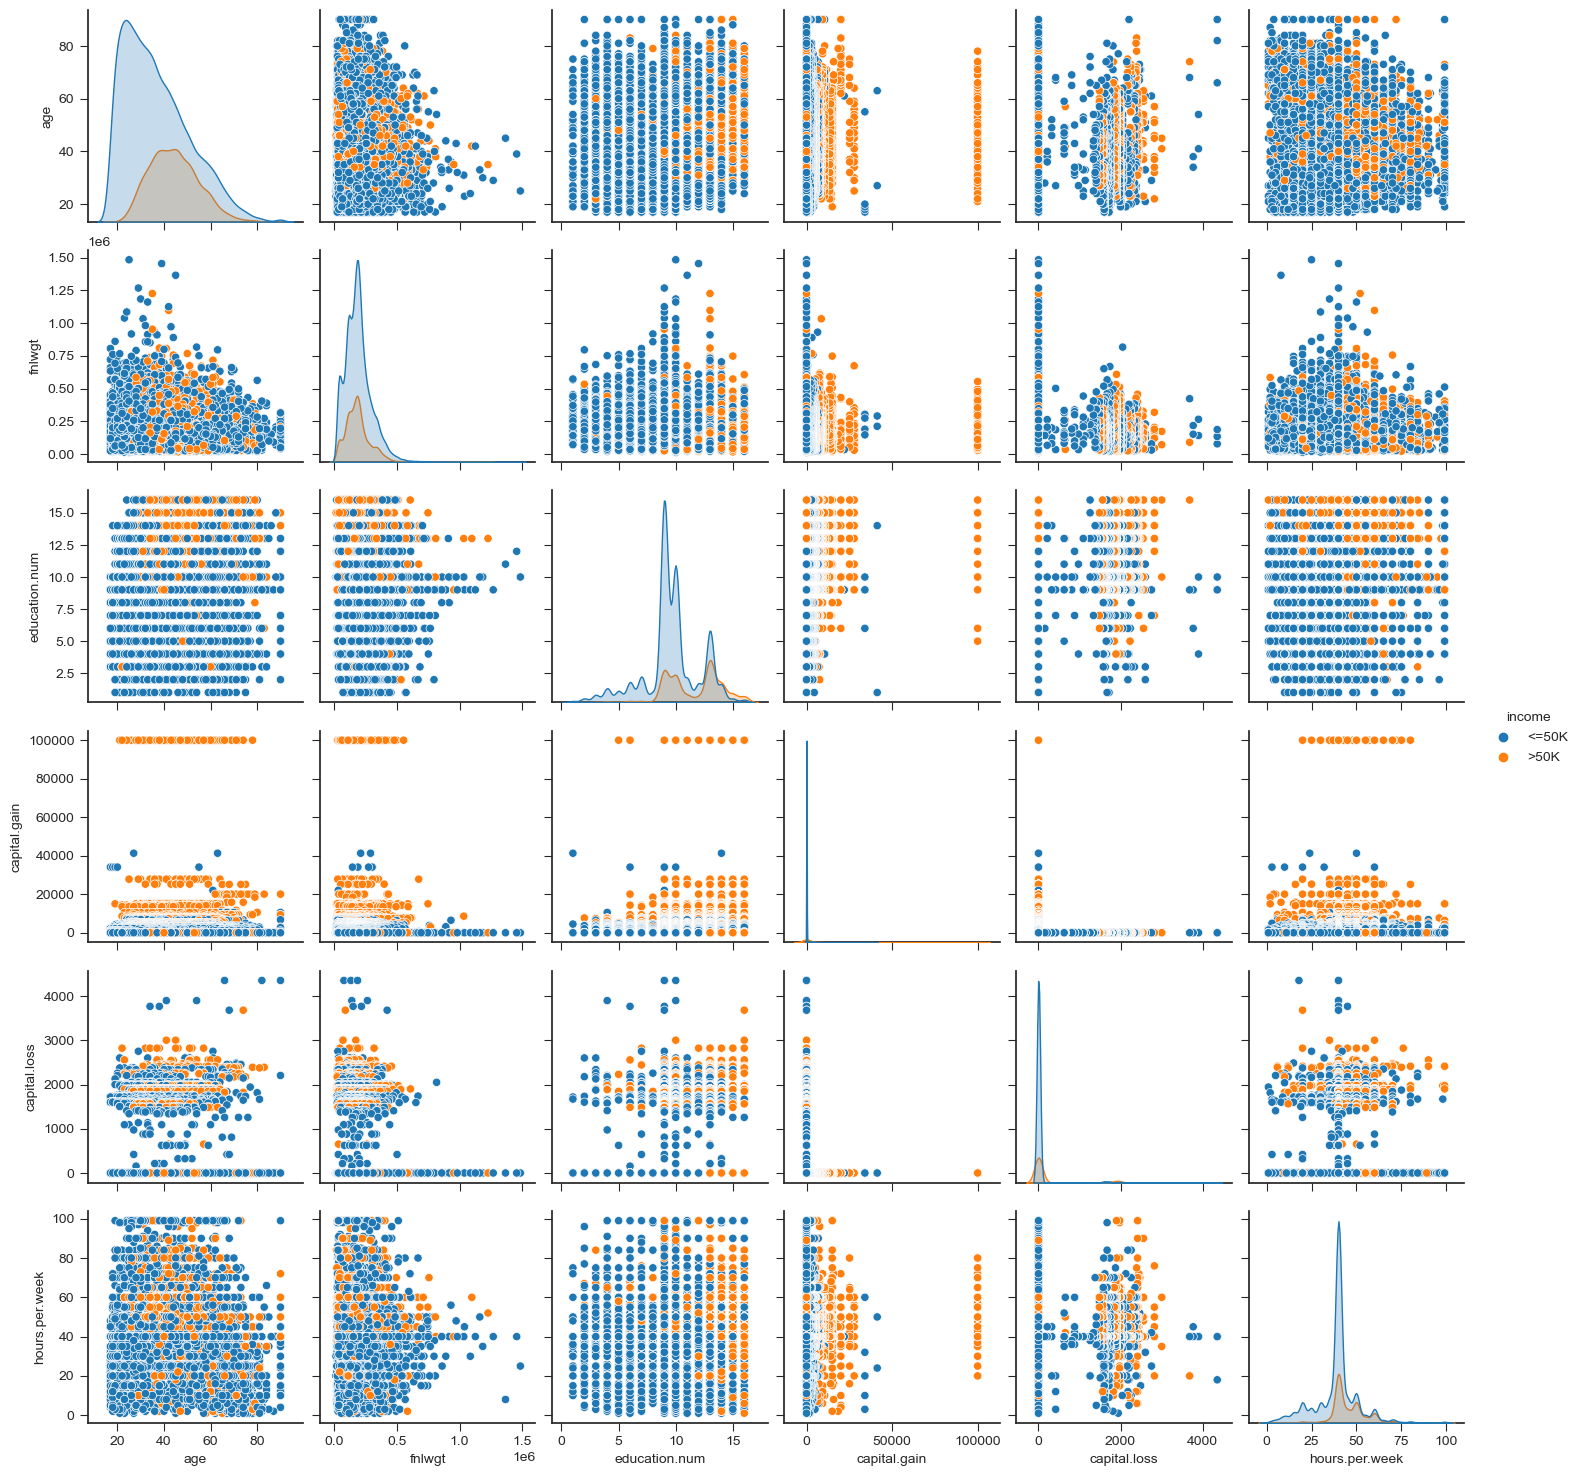

In [13]:
p=sns.pairplot(df, hue='income')

👉 above plot is pair plot in this income related to hours per week,capital_gain,capital_loss,eduaction_num,fnlwght and age.

<AxesSubplot:>

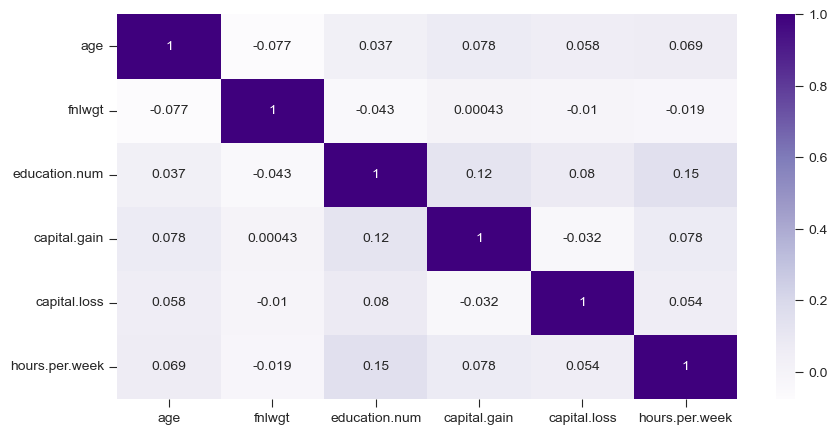

In [14]:
correlation=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot = True, cmap = 'Purples')

👉we used label encoder for convert categorical data to numeric data

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df=df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,0,2649,11,8,6,0,1,4,0,0,91,39,39,0
1,65,4,6514,11,8,6,4,1,4,0,0,91,17,39,0
2,49,0,11175,15,9,6,0,4,2,0,0,91,39,39,0
3,37,4,7009,5,3,0,7,4,4,0,0,90,39,39,0
4,24,4,16850,15,9,5,10,3,4,0,0,90,39,39,0


👉 Unecessary variables will be dropped in this section.

In [17]:
drop_elements=['education', 'native.country', 'income', 
'hours.per.week']
y=df['income']
X=df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss
0,72,0,2649,8,6,0,1,4,0,0,91
1,65,4,6514,8,6,4,1,4,0,0,91
2,49,0,11175,9,6,0,4,2,0,0,91
3,37,4,7009,3,0,7,4,4,0,0,90
4,24,4,16850,9,5,10,3,4,0,0,90


# model building

The dataset contains the labels which we have to predict which is the dependent feature ‘Income level’. This feature is
discrete consisting of two categories income less than 50k and more than 50k.  So the problem we have is a Supervised 
Binary Classification type.That's why we are using some various model application as below.


In [18]:
# standardization of data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Logistic Regression:


In [19]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['income'],axis=1), 
                                                    df['income'], test_size=0.2, 
                                                    random_state=20)

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [21]:
predictions = logmodel.predict(X_test)
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
13376,7,4,1482,11,8,0,7,1,4,1,0,0,39,39
7676,3,4,5766,11,8,4,8,3,2,1,0,0,51,39
32188,20,4,19343,12,13,4,10,1,4,0,0,0,39,39
30550,40,7,4613,2,7,0,8,4,4,0,0,0,39,39
18873,29,2,10504,9,12,2,10,5,4,0,0,0,39,39


In [22]:
accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')

78.81160755412252 %


In [23]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4963
           1       0.62      0.28      0.38      1550

    accuracy                           0.79      6513
   macro avg       0.72      0.61      0.63      6513
weighted avg       0.76      0.79      0.76      6513



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[4706,  257],
       [1123,  427]], dtype=int64)

👉Logistic regression accuracy : 78.81 % 

# Decision tree classifier :

In [26]:

dt_classifier=DecisionTreeClassifier(max_depth = 3)
dt_classifier.fit(X_train, y_train)
dt_predict=dt_classifier.predict(X_test)

# creating confusion matrix

In [27]:
cm=confusion_matrix(y_test, dt_predict)

In [28]:
accuracy=dt_classifier.score(X_test,dt_predict)
print(accuracy*100,'%')

100.0 %


In [29]:
print(cm)
print()
print("classification report\n",classification_report(y_test,dt_predict))

[[4726  237]
 [ 821  729]]

classification report
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4963
           1       0.75      0.47      0.58      1550

    accuracy                           0.84      6513
   macro avg       0.80      0.71      0.74      6513
weighted avg       0.83      0.84      0.82      6513



This model worked accuracy 100% means our model is overfitted it is practically it is not good thats why we try some other algoritm.The decision tree algorithm works by selecting the feature that provides the most information gain, or reduction in impurity, at each node. Information gain is typically measured by entropy or Gini impurity, which are measures of the degree of randomness or uncertainty in the class distribution at a given node. The algorithm stops when all the observations in a node belong to the same class, or when some other stopping criterion is met, such as a maximum depth or a minimum number of observations per node.

# naive bays classifier :

In [30]:
# training naive bayes classifier


In [31]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  

In [32]:
# accuracy on x_test
accuracy=gnb.score(X_test, y_test)
print(accuracy*100,'%')
print()
print(classification_report(y_test,gnb_predictions))

82.2815906648242 %

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4963
           1       0.68      0.48      0.56      1550

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



In [33]:
cm=confusion_matrix(y_test, gnb_predictions)
print(cm)

[[4622  341]
 [ 813  737]]


👉naive bayes classifier accuracy : 82.28 % 

# SVC(support vector classifier) :

In [34]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed=scaler.transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.3)

In [35]:
model = SVC() 
model.fit(X_train,y_train)


SVC()

In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print()
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:85.46419796419796
Test Set Accuracy:84.97287337496161


Confusion Matrix:
[[7015 1065]
 [ 403 1286]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      8080
           1       0.55      0.76      0.64      1689

    accuracy                           0.85      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.88      0.85      0.86      9769



SVC accuracy is :
Train Set Accuracy:85.42
Test Set Accuracy:84.76

# k nearest neighbors :

In [37]:

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [38]:
pred=model.predict(X_test)

In [39]:
pred

array([1, 0, 0, ..., 1, 0, 0])

In [40]:
accuracy=model.score(X_test,y_test)
print(accuracy*100,'%')
print()
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,pred))
print("\nClassificationReport:\n%s"%classification_report(y_test, pred))

82.88463507011977 %


Confusion Matrix:
[[6664  754]
 [ 918 1433]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7418
           1       0.66      0.61      0.63      2351

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769



k-nearest neighbour model accuracy is 82.83%

END